<a href="https://colab.research.google.com/github/KrishChothani/Computer-Vision-Using-Deep-Learning/blob/main/CVDL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

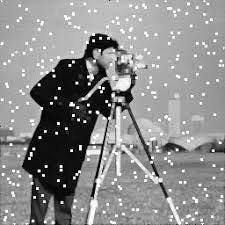

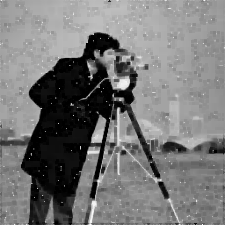

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("min_f_image.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
cv2_imshow(img)

out = np.copy(img)

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

for i in range(1, h-1):
    for j in range(1, w-1):
        mn = img[i, j]
        for ii in range(4):
            for jj in range(4):
              ni = i + dx[ii]
              nj = j + dy[jj]
              mn = min(mn, img[ni, nj])
        out[i, j] = mn

cv2_imshow(out)


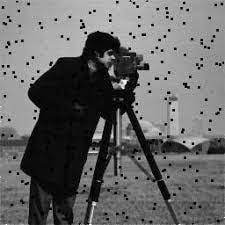

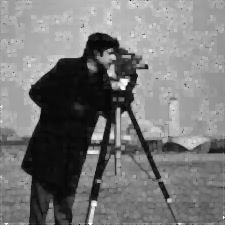

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("max_f_image.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
cv2_imshow(img)

out = np.copy(img)

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

for i in range(1, h-1):
    for j in range(1, w-1):
        mn = img[i, j]
        for ii in range(4):
            for jj in range(4):
              ni = i + dx[ii]
              nj = j + dy[jj]
              mn = max(mn, img[ni, nj])
        out[i, j] = mn

cv2_imshow(out)


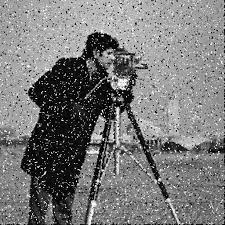

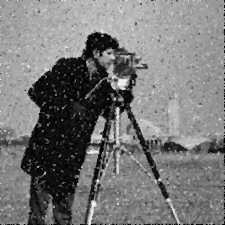

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("med_f_image.jpg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
cv2_imshow(img)

out = np.copy(img)

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

for i in range(1, h-1):
    for j in range(1, w-1):
        neighbors = []
        for ii in range(4):
            for jj in range(4):
              ni = i + dx[ii]
              nj = j + dy[jj]
              neighbors.append(img[ni, nj])

        out[i, j] = np.median(neighbors)

cv2_imshow(out)


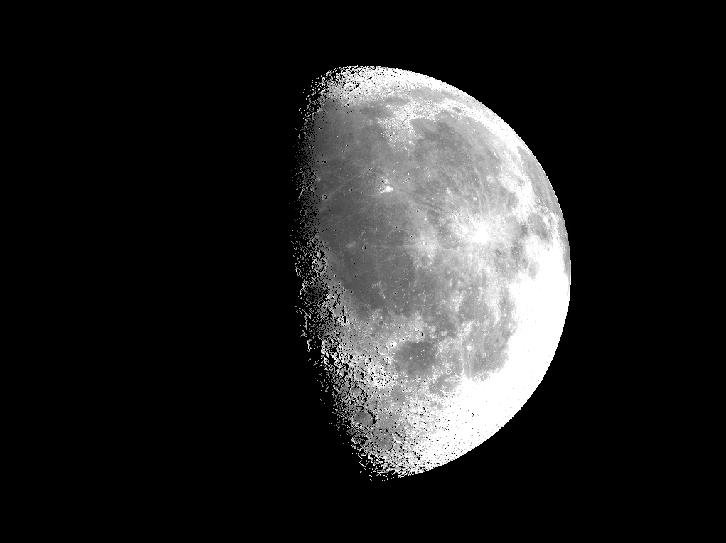

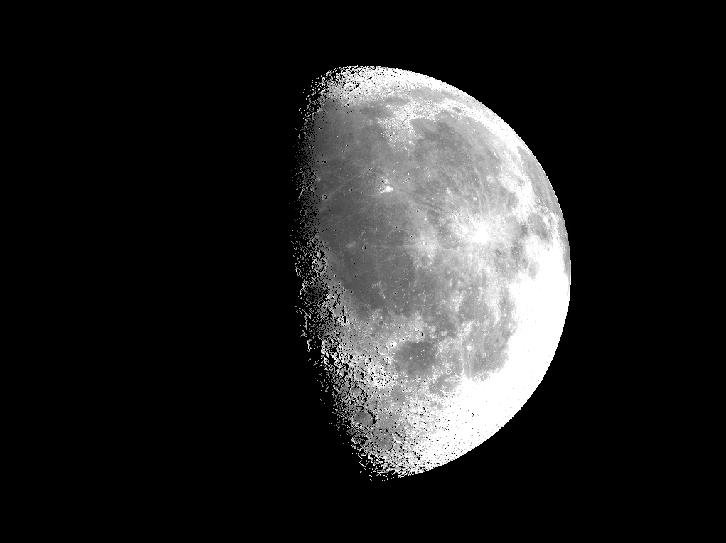

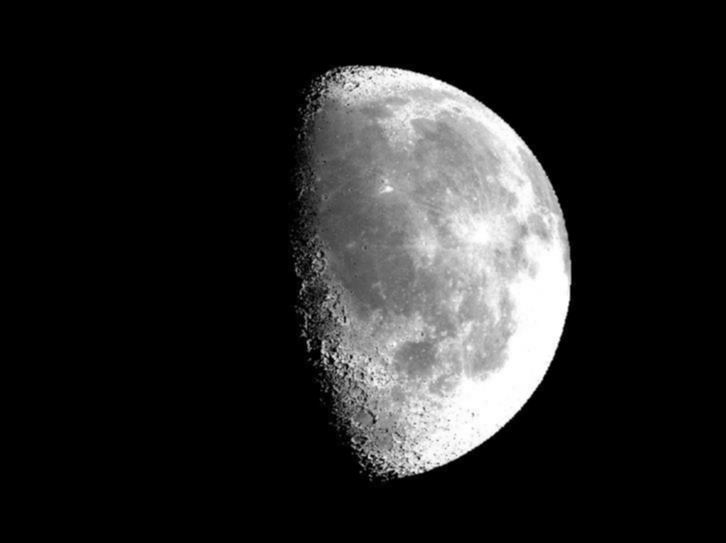

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
cv2_imshow(img)

out = np.copy(img)

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

for i in range(1, h-1):
    for j in range(1, w-1):
        neighbors = []
        for ii in range(4):
            for jj in range(4):
              ni = i + dx[ii]
              nj = j + dy[jj]
              neighbors.append(img[ni, nj])

        out[i, j] = int(np.mean(neighbors))
cv2_imshow(img)
cv2_imshow(out)


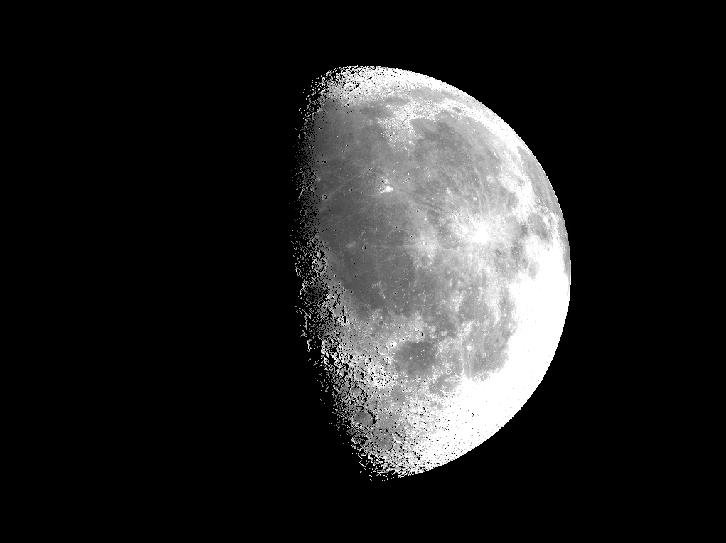

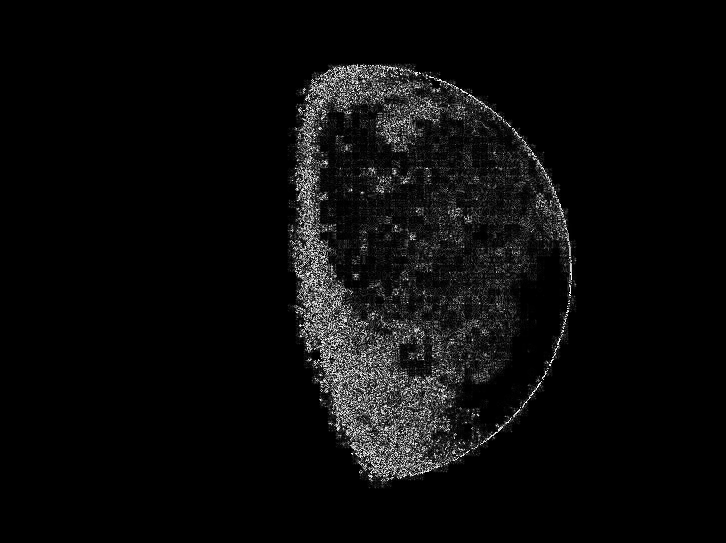

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

cv2_imshow(laplacian)


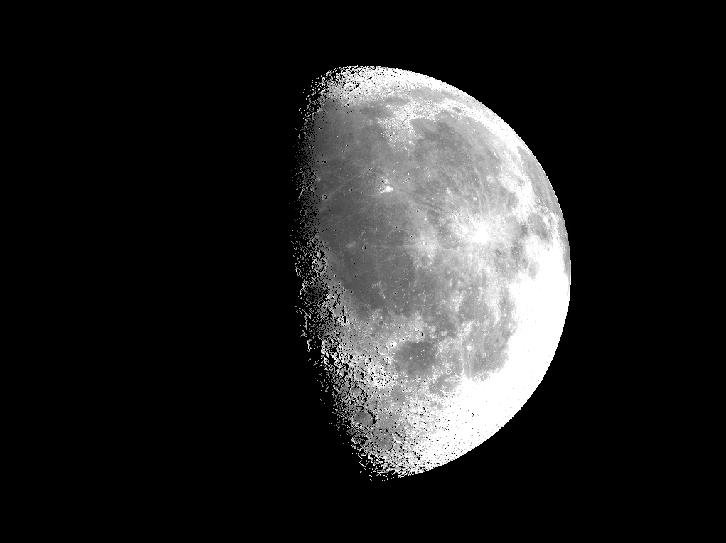

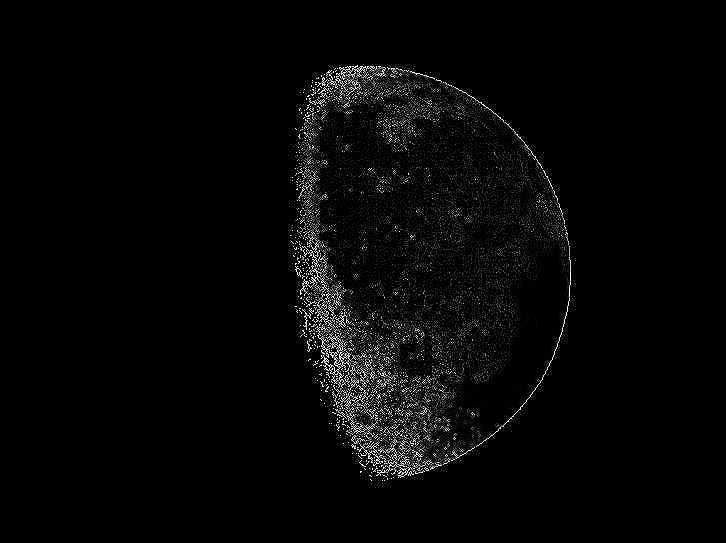

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)
h, w = img.shape
cv2_imshow(img)

laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

out = np.zeros_like(img, dtype=np.float32)

for i in range(1, h-1):
    for j in range(1, w-1):
        region = img[i-1:i+2, j-1:j+2]
        value = np.sum(region * laplacian_kernel)
        out[i, j] = value

out = np.clip(out, 0, 255).astype(np.uint8)

cv2_imshow(out)


In [10]:
import cv2
img = cv2.imread("boy.png", cv2.IMREAD_GRAYSCALE)

Original Image : 


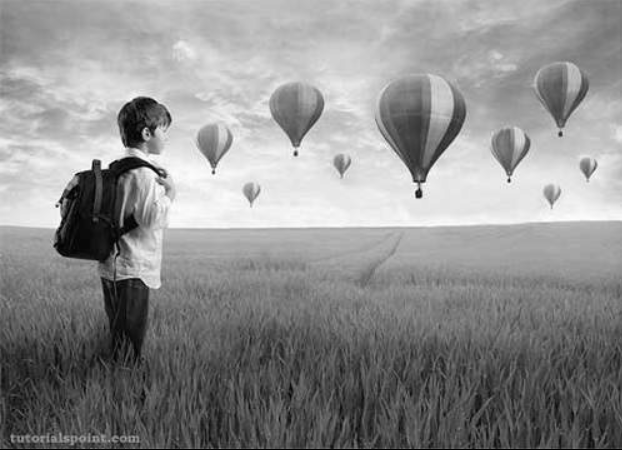

Sobel Filter : 


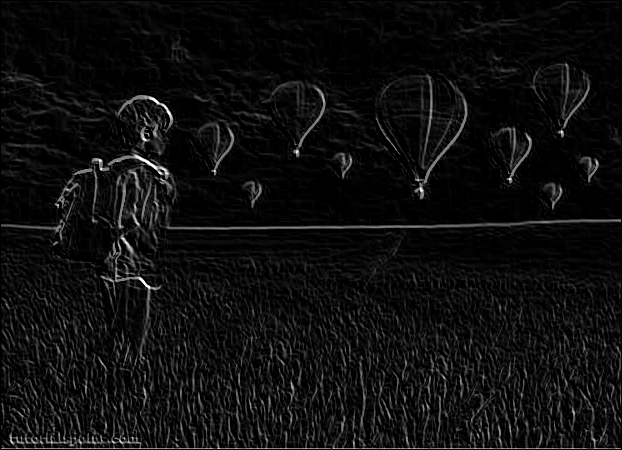

In [11]:
# Sobel Filter
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

def apply_filter(image, kernel):
    h, w = image.shape
    k = kernel.shape[0] // 2
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(k, h-k):
        for j in range(k, w-k):
            region = image[i-k:i+k+1, j-k:j+k+1]
            value = np.sum(kernel * region)
            output[i, j] = value
    return np.clip(output, 0, 255).astype(np.uint8)

sobel_x_img = apply_filter(img, sobel_x)
sobel_y_img = apply_filter(img, sobel_y)
sobel_img = cv2.addWeighted(sobel_x_img, 0.5, sobel_y_img, 0.5, 0)

sobel_img = np.clip(sobel_img, 0, 255)
sobel_img = ((sobel_img - np.min(sobel_img)) / (np.max(sobel_img) - np.min(sobel_img))) * 255
sobel_img = sobel_img.astype(np.uint8)

print("Original Image : ")
cv2_imshow(img)
print("Sobel Filter : ")
cv2_imshow(sobel_img)


Original Image : 


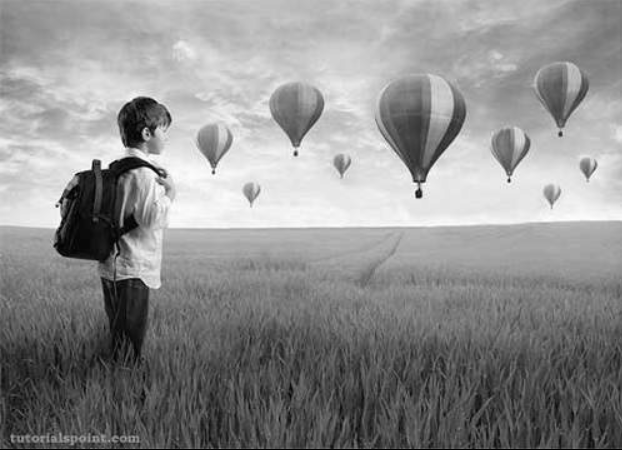

Prewitt Filter : 


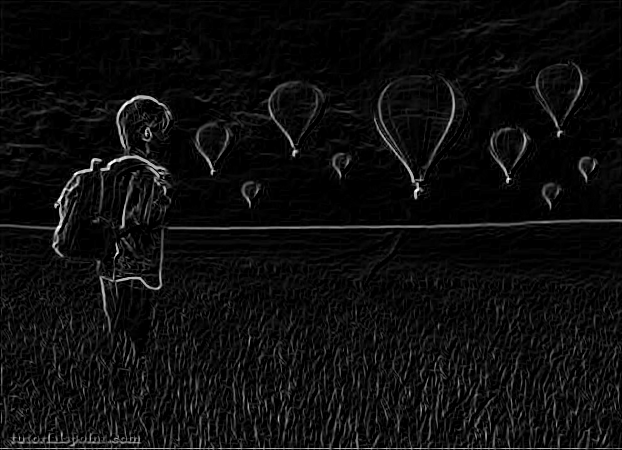

In [12]:

kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x = cv2.filter2D(img, -1, kernelx)
prewitt_y = cv2.filter2D(img, -1, kernely)

prewitt = np.sqrt(prewitt_x.astype(np.float32)**2 + prewitt_y.astype(np.float32)**2)
prewitt = ((prewitt - np.min(prewitt)) / (np.max(prewitt) - np.min(prewitt))) * 255
prewitt = prewitt.astype(np.uint8)

print("Original Image : ")
cv2_imshow(img)
print("Prewitt Filter : ")
cv2_imshow(prewitt)

Original Image : 


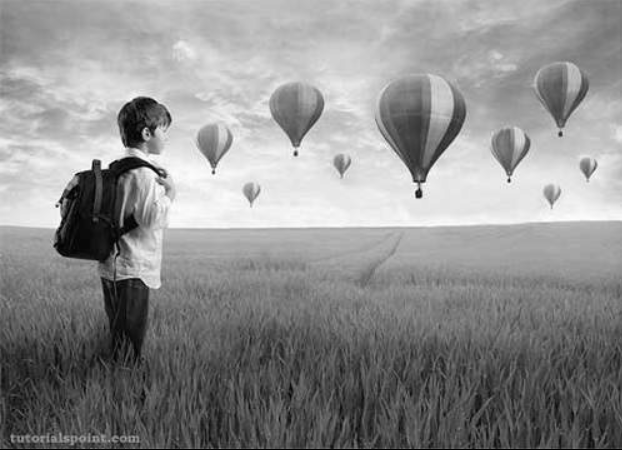

Roberts Filter : 


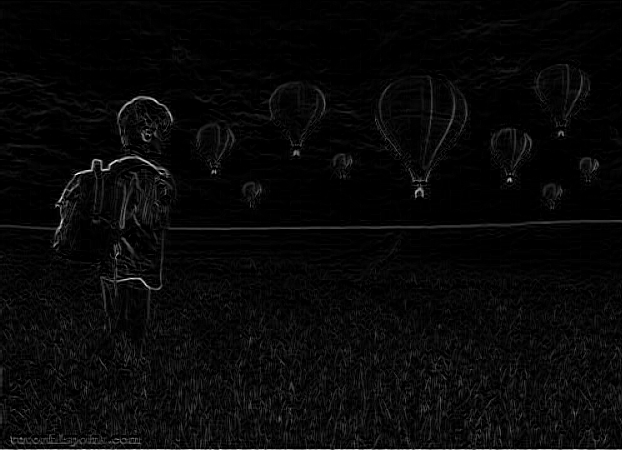

In [13]:

roberts_x = np.array([[1, 0],
                      [0, -1]], dtype=np.float32)

roberts_y = np.array([[0, 1],
                      [-1, 0]], dtype=np.float32)

roberts_x_img = cv2.filter2D(img, -1, roberts_x)
roberts_y_img = cv2.filter2D(img, -1, roberts_y)

roberts = np.sqrt(roberts_x_img.astype(np.float32)**2 + roberts_y_img.astype(np.float32)**2)
roberts = ((roberts - np.min(roberts)) / (np.max(roberts) - np.min(roberts))) * 255
roberts = roberts.astype(np.uint8)

print("Original Image : ")
cv2_imshow(img)
print("Roberts Filter : ")
cv2_imshow(roberts)